In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as ms
%matplotlib inline

In [6]:
data_station = pd.read_csv('example_sprit_cut_station.csv', delimiter = ',')
data_prices = pd.read_csv('example_sprit_cut_prices.csv', delimiter = ',')

In [4]:
data_station.head()

,ID,VERSION,VERSION_TIME,NAME,BRAND,STREET,HOUSE_NUMBER,POST_CODE,PLACE,PUBLIC_HOLIDAY_IDENTIFIER,LAT,LNG
0,d37bee76-91b6-485a-b974-24f1b0d391fa,4,2015-01-09 10:26:15.000000,Aral Tankstelle,ARAL,An der Tagweide,2,76139,Karlsruhe,\N,49.020280,8.459429
1,51d4b652-a095-1aa0-e100-80009459e03a,796,2015-09-28 21:00:13.000000,JET MANNHEIM UNTERMUEHLAUSTRASSE 83,JET,UNTERMUEHLAUSTRASSE 83,\N,68169,MANNHEIM,\N,49.508962,8.467691
2,c7caf231-0e47-40db-92de-9349a2eb2bef,4,2014-09-26 13:24:57.000000,Aral Tankstelle,ARAL,Trippstadter Straße,69,67663,Kaiserslautern,\N,49.433754,7.757465
3,51d4b53b-a095-1aa0-e100-80009459e03a,796,2015-09-28 21:00:13.000000,JET KAISERSLAUTERN PARISER STR. 167,JET,PARISER STR. 167,\N,67655,KAISERSLAUTERN,\N,49.442200,7.748360
4,51d4b70f-a095-1aa0-e100-80009459e03a,796,2015-09-28 21:00:13.000000,JET GERMERSHEIM MUENCHENER STRASSE 12,JET,MUENCHENER STRASSE 12,\N,76726,GERMERSHEIM,\N,49.226800,8.374400


In [7]:
data_prices.head()

,ID,E5,E10,DIESEL,DATE_CHANGED,CHANGED,Unnamed: 6
0,01bf5a06-4248-43a5-9524-56123fa3ab2f,1589,1549,1389,2014-10-02,05:22:01.000000,21
1,01bf5a06-4248-43a5-9524-56123fa3ab2f,1569,1529,1369,2014-10-02,05:26:01.000000,21
2,01bf5a06-4248-43a5-9524-56123fa3ab2f,1569,1529,1359,2014-10-02,09:06:01.000000,1
3,01bf5a06-4248-43a5-9524-56123fa3ab2f,1539,1499,1339,2014-10-03,12:14:01.000000,21
4,01bf5a06-4248-43a5-9524-56123fa3ab2f,1529,1489,1329,2014-10-03,14:14:01.000000,21


In [11]:
data_final = pd.merge(data_prices,data_station, on='ID', how = 'inner')

In [13]:
data_final.tail()

,ID,E5,E10,DIESEL,DATE_CHANGED,CHANGED,Unnamed: 6,VERSION,VERSION_TIME,NAME,BRAND,STREET,HOUSE_NUMBER,POST_CODE,PLACE,PUBLIC_HOLIDAY_IDENTIFIER,LAT,LNG
2097145,044b327b-8726-428a-867c-a48235121cf2,1339,1319,1119,2015-09-28,14:06:01.000000,21,328,2014-11-03 11:29:35.000000,Rastatt Am Zubringer 6,OMV,Am Zubringer,6,76437,Rastatt,deBY,48.8598,8.2547
2097146,044b327b-8726-428a-867c-a48235121cf2,1359,1339,1149,2015-09-29,13:30:01.000000,21,328,2014-11-03 11:29:35.000000,Rastatt Am Zubringer 6,OMV,Am Zubringer,6,76437,Rastatt,deBY,48.8598,8.2547
2097147,044b327b-8726-428a-867c-a48235121cf2,1359,1339,1149,2015-09-29,13:30:01.000000,21,328,2014-11-03 11:29:35.000000,Rastatt Am Zubringer 6,OMV,Am Zubringer,6,76437,Rastatt,deBY,48.8598,8.2547
2097148,044b327b-8726-428a-867c-a48235121cf2,1339,1319,1119,2015-09-29,14:34:01.000000,21,328,2014-11-03 11:29:35.000000,Rastatt Am Zubringer 6,OMV,Am Zubringer,6,76437,Rastatt,deBY,48.8598,8.2547
2097149,044b327b-8726-428a-867c-a48235121cf2,1339,1319,1119,2015-09-29,14:34:01.000000,21,328,2014-11-03 11:29:35.000000,Rastatt Am Zubringer 6,OMV,Am Zubringer,6,76437,Rastatt,deBY,48.8598,8.2547


In [14]:
data_final.drop_duplicates(subset='ID', keep='first', inplace=False)

,ID,E5,E10,DIESEL,DATE_CHANGED,CHANGED,Unnamed: 6,VERSION,VERSION_TIME,NAME,BRAND,STREET,HOUSE_NUMBER,POST_CODE,PLACE,PUBLIC_HOLIDAY_IDENTIFIER,LAT,LNG
0,01bf5a06-4248-43a5-9524-56123fa3ab2f,1589,1549,1389,2014-10-02,05:22:01.000000,21,12,2015-04-27 12:00:03.000000,Esso Tankstelle,ESSO,ZELLERTALSTR. 30,,67551,WORMS,\N,49.633409,8.273847
8466,d4d2ffc7-db50-4dc2-89a7-f10eb0d391b8,1579,1539,1389,2014-09-28,10:34:01.000000,21,3,2013-08-23 04:34:47.000000,Aral Tankstelle,ARAL,Bischheimer Straße,9,67292,Kirchheimbolanden,\N,49.668570,8.020080
11030,f2d46ca3-641b-44c3-8fe5-3c047026973f,1309,1269,1169,2014-12-15,12:58:01.000000,1,3,2013-08-23 04:34:47.000000,Aral Tankstelle,ARAL,Frankenthaler Straße,86,68307,Mannheim,\N,49.550114,8.449075
13034,51d4b69f-a095-1aa0-e100-80009459e03a,1559,1519,1359,2014-08-19,22:50:01.000000,21,796,2015-09-28 21:00:33.000000,Supermarkt-Tankstelle LUDWIGSHAFEN OGGERSHEIM ...,Supermarkt-Tankstelle,ODERSTRASSE 2,\N,67071,LUDWIGSHAFEN OGGERSHEIM,\N,49.491300,8.355880
22562,eb39e146-8263-4093-835d-30c8073e2eb2,1399,1379,1139,2015-08-13,14:50:01.000000,21,1,2013-07-31 22:00:00.000000,RAMSTEIN LANDSTUHLER STR.,Shell,LANDSTUHLER STR. 72,NaN,66877,RAMSTEIN,\N,49.440489,7.555197
28150,9aab1ae8-c032-4834-bee4-bb0227ec4e3f,0,0,1319,2014-12-14,22:02:01.000000,1,1,2013-07-31 22:00:00.000000,EISENBERG ALFRED- NOBEL- ST.,Shell,ALFRED-NOBEL-STR. 2 A,NaN,67304,EISENBERG,\N,49.563500,8.082050
35226,c4c59cea-3b83-46d0-b783-134c25c65df7,1459,1439,1229,2015-06-15,16:58:01.000000,21,1,2013-07-31 22:00:00.000000,NEUSTADT MUßBACHER LANDSTR. 16,Shell,MUßBACHER LANDSTR. 16,NaN,67433,Neustadt,\N,49.359600,8.151400
41974,22164fef-8f55-4c6e-9051-9e6bfc32c535,1329,1289,1199,2014-12-14,16:30:01.000000,63,1,2013-07-31 22:00:00.000000,HOCHSTADT NEUSTADTER STR.2.,Shell,NEUSTADTER STR. 2,NaN,76879,Hochstadt,\N,49.239979,8.222378
48278,d366d4bb-f334-4a39-8d1e-008da3b3c9f7,1309,1269,1199,2014-12-15,16:22:01.000000,1,3,2013-08-23 04:34:48.000000,Aral Tankstelle,ARAL,Rheinstraße,128,76870,Kandel,\N,49.085266,8.210204
50590,1db8c369-2742-4f18-a4cb-fcb536294636,1509,1469,1299,2014-09-12,14:30:01.000000,21,4,2013-09-23 15:05:05.000000,Aral Tankstelle,ARAL,Friedrich-Ebert-Straße,12-14,68167,Mannheim,\N,49.496582,8.487706


In [18]:
data_final.describe()

,E5,E10,DIESEL,Unnamed: 6,VERSION,LAT,LNG
count,2.097150e+06,2.097150e+06,2.097150e+06,2.097150e+06,2.097150e+06,2.097150e+06,2.097150e+06
mean,1.437028e+03,1.407364e+03,1.245482e+03,1.871862e+01,1.440874e+02,4.931761e+01,8.198789e+00
std,1.946457e+02,1.966634e+02,1.062559e+02,7.971526e+00,2.820274e+02,2.479620e-01,2.795665e-01
min,-1.000000e+00,-1.000000e+00,-1.000000e+00,1.000000e+00,1.000000e+00,4.880079e+01,7.505350e+00
25%,1.379000e+03,1.349000e+03,1.169000e+03,2.100000e+01,1.000000e+00,4.911630e+01,8.106810e+00
50%,1.459000e+03,1.429000e+03,1.229000e+03,2.100000e+01,4.000000e+00,4.935564e+01,8.307890e+00
75%,1.529000e+03,1.489000e+03,1.319000e+03,2.100000e+01,2.900000e+01,4.949658e+01,8.409490e+00
max,9.999000e+03,9.999000e+03,1.129000e+04,6.300000e+01,8.810000e+02,4.979940e+01,8.499941e+00


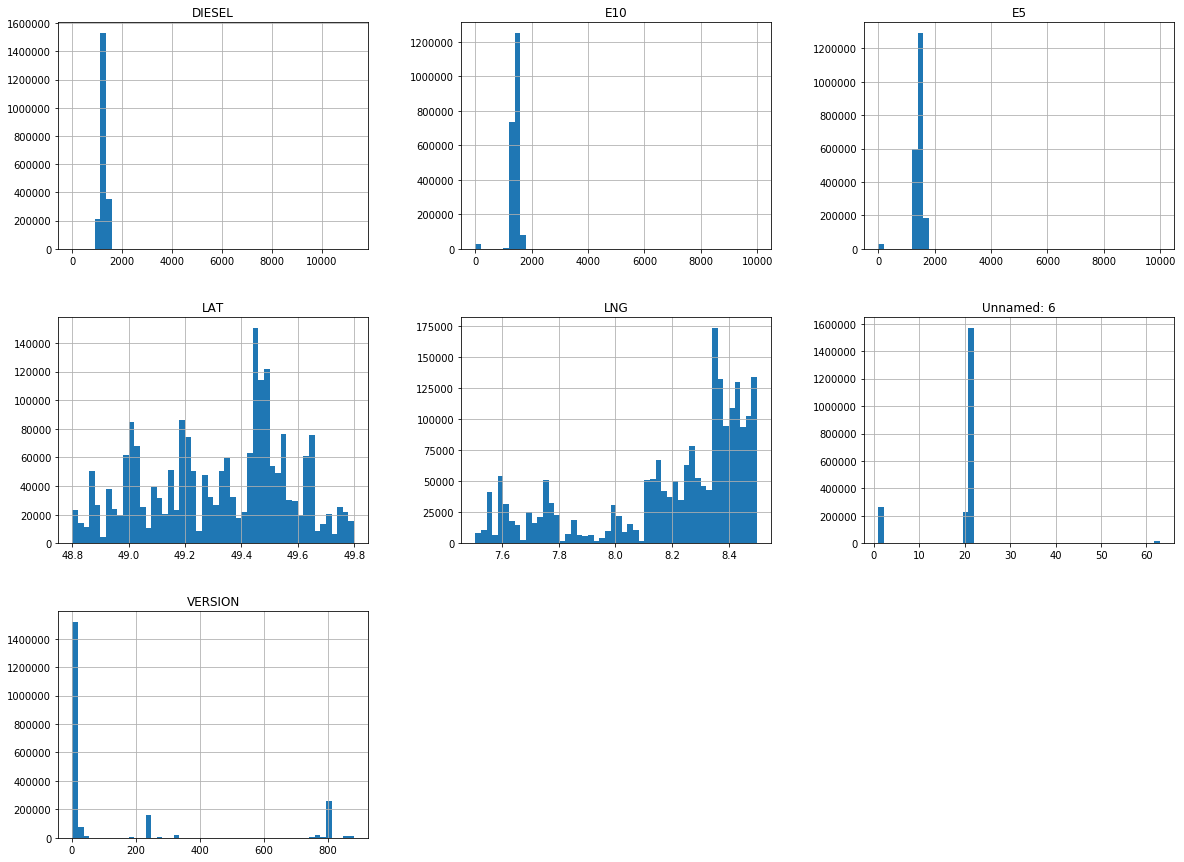

In [19]:
data_final.hist(bins=50, figsize=(20,15))
plt.savefig("attribute_histogram_plots")
plt.show()

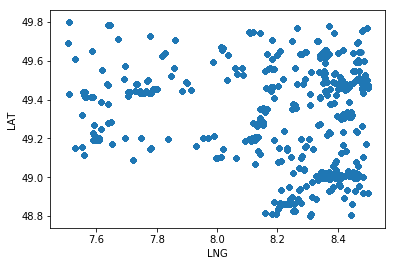

In [21]:
data_final.plot(kind="scatter", x="LNG", y="LAT", alpha=0.2)
plt.savefig('map1.png')
plt.show()

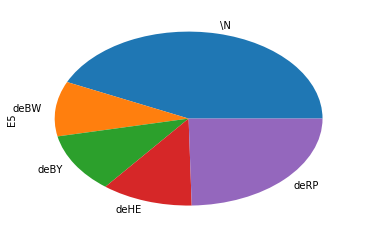

In [30]:
data_final.groupby('PUBLIC_HOLIDAY_IDENTIFIER')['E5'].nunique().plot(kind='pie')

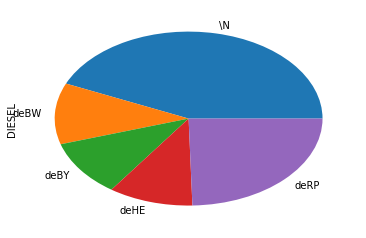

In [32]:
data_final.groupby('PUBLIC_HOLIDAY_IDENTIFIER')['DIESEL'].nunique().plot(kind='pie')

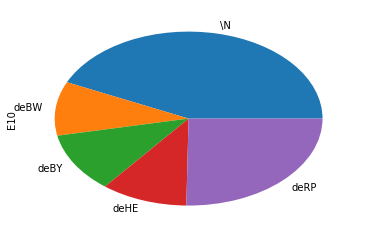

In [33]:
data_final.groupby('PUBLIC_HOLIDAY_IDENTIFIER')['E10'].nunique().plot(kind='pie')